# DBSCAN for outlier detection

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [3]:
address = 'C:/Users/Priya Bhatia/OneDrive/Machine Learning Andrew Course/iris.data.csv'
df = pd.read_csv(address,header = None,sep=',')

data = df.iloc[:,0:4].values
target = df.iloc[:,4].values

df[:5]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width','Species']

df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)


# Visualize your results

In [6]:
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))
print(outliers_df[model.labels_==-1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN for outlier Detection')

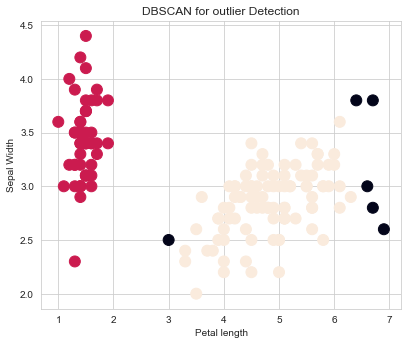

In [7]:
fig = plt.figure()
ax = fig.add_axes([-1,-1,1,1])

colors = model.labels_

ax.scatter(data[:,2],data[:,1],c=colors,s=120)
ax.set_xlabel('Petal length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for outlier Detection')